In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


data = pd.read_csv("pima/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

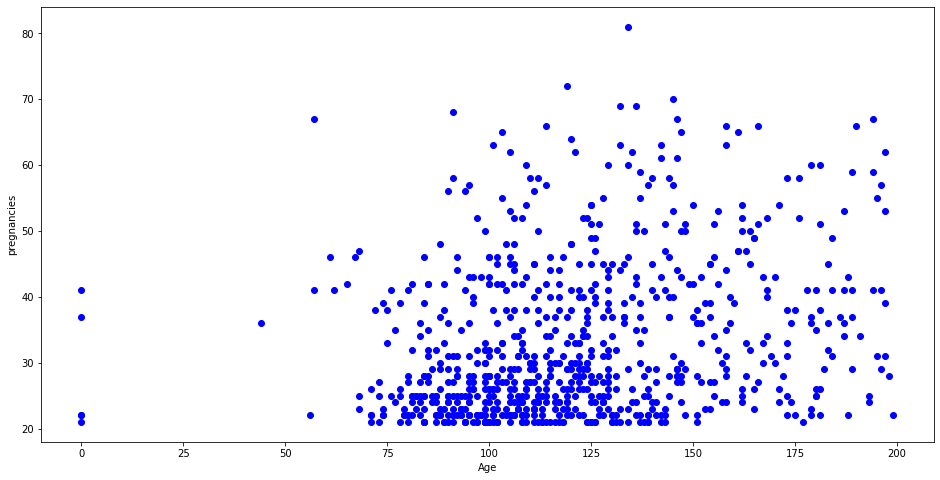

In [72]:
# Visualising the Test set results
plt.figure(figsize=(16,8))
plt.scatter(
    data["Glucose"],
    data["Age"],
    c="blue"
)
plt.xlabel("Age")
plt.ylabel("pregnancies")
plt.show()

In [84]:
X = data["Pregnancies"].values.reshape(-1,1)
Y = data["Age"].values.reshape(-1,1)


rg = LinearRegression()
rg.fit(X,Y)

LinearRegression()

In [80]:
print(rg.coef_[0][0])
print(rg.intercept_[0])

print("Y= {:.5} + {:.5}X".format(rg.intercept_[0], rg.coef_[0][0]))

0.09692635731314768
21.523018883523665
Y= 21.523 + 0.096926X


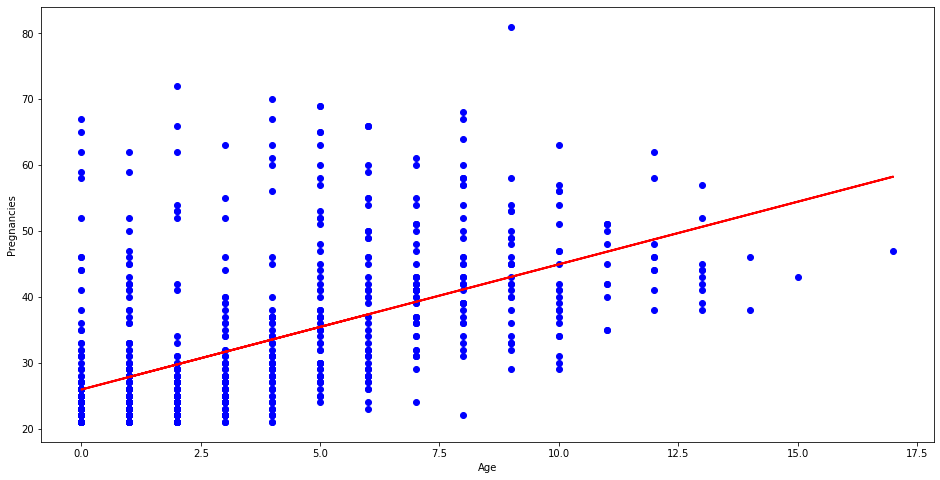

In [88]:
predictions = rg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data["Pregnancies"],
    data["Age"],
    c="blue"
)
plt.plot(
    data["Pregnancies"],
    predictions,
    c="red",
    linewidth=2
)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()

In [67]:
X = data["Pregnancies"]
Y = data["Age"]

X1 = smf.add_constant(X)
est = smf.OLS(Y, X1)
est1 =est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     322.5
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           1.86e-60
Time:                        12:22:50   Log-Likelihood:                -2847.2
No. Observations:                 768   AIC:                             5698.
Df Residuals:                     766   BIC:                             5708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.9360      0.541     47.970      

In [69]:
X = data["Pregnancies"].values.reshape(-1,1)
Y = data["Age"].values.reshape(-1,1)

rg.score(X, Y)

0.29630737293856724

In [71]:
X = np.column_stack((data['Pregnancies'], data['DiabetesPedigreeFunction'], data['BMI']))
y = data['Age']

X2 = smf.add_constant(X)
est = smf.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     108.8
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           1.15e-58
Time:                        12:27:31   Log-Likelihood:                -2845.5
No. Observations:                 768   AIC:                             5699.
Df Residuals:                     764   BIC:                             5718.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1569      1.569     15.392      0.0